In [1]:
from numpy import nan as NA
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
#/Users/apple/Desktop/youtube-new/CAvideos.csv 
# Import data
path = "/Users/apple/Desktop/youtube-new"
df=pd.read_csv(path+"/CAvideos.csv", usecols=[items for items in range(16)], sep=",")
#df.head(10)

In [3]:
#change the trending_date
df['trending_date'].replace('\.','-',regex=True,inplace=True) #'-' no regular expression
type(df['trending_date'][0])
df['new_column']='20'
df['trending_date'] = df.agg(lambda x: f"{x['new_column']}{x['trending_date']}", axis=1)
df['trending_date'] = pd.to_datetime(df['trending_date'],format='%Y-%d-%m')         
del df['new_column']                            
#type(df['trending_date'][0])
                             

In [4]:
#change the publish_time column
df.insert(5,'publish_date',df['publish_time'].map(lambda name:name.split('T')[0])) 
df['publish_time']=df['publish_time'].map(lambda name:name.split('T')[1])
df['publish_date'] = pd.to_datetime(df['publish_date']) 
df['publish_time'] = pd.to_datetime(df['publish_time']) 
#df.head()

In [5]:
df.info() #df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
video_id                  40881 non-null object
trending_date             40881 non-null datetime64[ns]
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_date              40881 non-null datetime64[ns]
publish_time              40881 non-null datetime64[ns, UTC]
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), datetime64[ns, UTC](1), datetime64[ns](2

In [6]:
for col in df.columns: 
    print(col) 

video_id
trending_date
title
channel_title
category_id
publish_date
publish_time
tags
views
likes
dislikes
comment_count
thumbnail_link
comments_disabled
ratings_disabled
video_error_or_removed
description


In [7]:
# Translate the boolean values into numeric values
df["comments_disabled"]=df["comments_disabled"].astype(int)
df["ratings_disabled"]=df["ratings_disabled"].astype(int)
df["video_error_or_removed"]=df["video_error_or_removed"].astype(int)

In [8]:
#df['description']

In [9]:
# Use normalization to reduce skewness of the data if necessary
from sklearn import preprocessing
import numpy as np
# Normalize views
x_array = np.array(df['views'])
normalized_X = preprocessing.normalize([x_array])
normalized_X_dataframe = pd.DataFrame(normalized_X)   
df['views']=normalized_X_dataframe.T
#display(df['views'])

# Normalize likes
x_array = np.array(df['likes'])
normalized_Y = preprocessing.normalize([x_array])
normalized_Y_dataframe = pd.DataFrame(normalized_Y)   
df['likes']=normalized_Y_dataframe.T


# Normalize dislikes
x_array = np.array(df['dislikes'])
normalized_Z = preprocessing.normalize([x_array])
normalized_Z_dataframe = pd.DataFrame(normalized_Z)   
df['dislikes']=normalized_Z_dataframe.T


# Normalize comment_count
x_array = np.array(df['comment_count'])
normalized_C = preprocessing.normalize([x_array])
normalized_C_dataframe = pd.DataFrame(normalized_C)   
df['comment_count']=normalized_C_dataframe.T

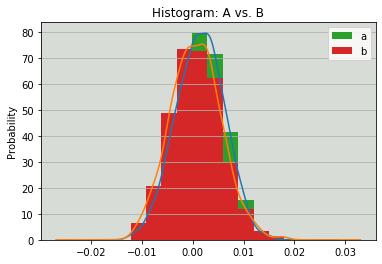

In [10]:
 # Sample from two different normal distributions
means = df['likes'].mean(), df['dislikes'].mean()
stdevs = df['likes'].std(axis = 0, skipna = True), df['dislikes'].std(axis = 0, skipna = True)
dist = pd.DataFrame(
np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
columns=['a', 'b'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

In [11]:
#https://data-science-blog.com/en/blog/2018/11/04/sentiment-analysis-using-python/
#https://medium.com/@datanizing/modern-text-mining-with-python-part-2-of-5-data-exploration-with-pandas-ee3456cf6a4

In [22]:
# present the 
df["title"]=df["title"].astype(str)
df_new = df[df['title'].notnull()]

In [19]:
df

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,2020-04-09 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",0.023707,0.028126,0.011235,0.028095,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0,0,0,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,2020-04-09 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",0.001402,0.004565,0.000437,0.002908,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,0,0,0,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,2020-04-09 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",0.004409,0.005216,0.001381,0.001826,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,2020-04-09 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",0.002896,0.004723,0.000515,0.003910,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0,0,0,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,2020-04-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",0.046318,0.058369,0.005455,0.018986,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,0,0,0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13,2020-04-09 07:37:51+00:00,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",0.001810,0.003706,0.001194,0.002710,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,0,0,0,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,2017-11-14,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12,2020-04-09 23:52:13+00:00,"Funny Moments|""Montage video games""|""gaming""|""...",0.004128,0.006696,0.002549,0.005943,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,0,0,0,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,2020-04-09 17:13:01+00:00,SHANtell martin,0.001034,0.002055,0.000768,0.003562,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,0,0,0,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,2017-11-14,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12,2020-04-09 20:19:24+00:00,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",0.006187,0.010460,0.001067,0.008122,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,0,0,0,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,2017-11-14,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10,2020-04-09 14:10:46+00:00,"God|""Sheldon Cooper""|""Young Sheldon""",0.000698,0.000148,0.000253,0.000331,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,0,0,0,Sheldon is roasting pastor of the church\nyoun...


In [27]:
import sys
!{sys.executable} -m pip install -U spacy

     |████████████████████████████████| 10.5MB 7.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 10.1MB/s eta 0:00:01
     |████████████████████████████████| 4.0MB 6.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 9.6MB/s  eta 0:00:01
     |████████████████████████████████| 2.2MB 10.7MB/s eta 0:00:01
     |████████████████████████████████| 184kB 8.8MB/s eta 0:00:01
     |████████████████████████████████| 215kB 8.4MB/s eta 0:00:01
  Found existing installation: tqdm 4.32.1
    Uninstalling tqdm-4.32.1:
      Successfully uninstalled tqdm-4.32.1
  Found existing installation: importlib-metadata 0.17
    Uninstalling importlib-metadata-0.17:
      Successfully uninstalled importlib-metadata-0.17


In [29]:
import sys
print(sys.executable)  #get the jupyter path

//anaconda3/bin/python


In [37]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: //anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    matplotlib-base-3.0.3      |   py37habd5b94_1         6.6 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    wordcloud-1.6.0            |   py37h0b31af3_0         167 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.8 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    conda-forge/osx-64::matplotlib-base-

In [38]:
from wordcloud import WordCloud

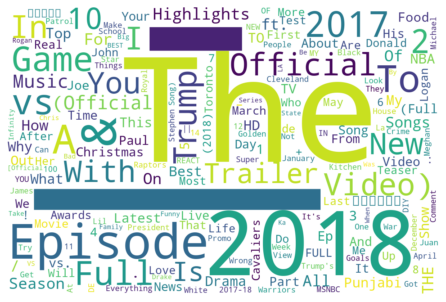

In [40]:
def my_tokenizer(text):
    return text.split() if text!= None else []
tokens=df_new.title.map(my_tokenizer).sum()
#create token list
from collections import Counter

counter=Counter(tokens)
counter.most_common(20)

#remove stop words
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    '''remove stopwords from a list of tokens.'''
    return [t for t in tokens if t not in STOP_WORDS]
#rebuild counter
counter=Counter(remove_stopwords(tokens))

#covert list of tuples onto wordcloud
from wordcloud import WordCloud

def wordcloud(counter):
    wc=WordCloud(width=1200,height=800,
                 background_color='white',
                 max_words=200)
    wc.generate_from_frequencies(counter)

    #plot
    fig=plt.figure(figsize=(6,4))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

#create wordcloud
wordcloud(counter)

